# Python project
group VSL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Imports our data files
data = pd.read_csv("steamspy_data.csv")


In [2]:
# Divides cent prices so we get prices in dollars
data['price'] = (data['price'] / 100)
data['initialprice'] = (data['initialprice'] / 100)

# Renames the columns to be more readable
data.rename(columns={'price': 'price in USD'}, inplace=True)
data.rename(columns={'initialprice': 'initial price in USD'}, inplace=True)


In [3]:
# Deletes median_2weeks, average_2weeks, userscore since we won't be using them
del data['median_2weeks']
del data['average_2weeks']
del data['userscore']

In [4]:
# Checks how big our data is (columns, rows)
data.shape

(29235, 17)

In [5]:
# Shows column names
data.columns

Index(['appid', 'name', 'developer', 'publisher', 'score_rank', 'positive',
       'negative', 'owners', 'average_forever', 'median_forever',
       'price in USD', 'initial price in USD', 'discount', 'languages',
       'genre', 'ccu', 'tags'],
      dtype='object')

In [6]:
# Shows values of the columns in the dataset
data.values

array([[10, 'Counter-Strike', 'Valve', ..., 'Action', 14923,
        '{\'Action\': 2681, \'FPS\': 2048, \'Multiplayer\': 1659, \'Shooter\': 1420, \'Classic\': 1344, \'Team-Based\': 943, \'First-Person\': 799, \'Competitive\': 790, \'Tactical\': 734, "1990\'s": 564, \'e-sports\': 550, \'PvP\': 480, \'Military\': 367, \'Strategy\': 329, \'Score Attack\': 200, \'Survival\': 192, \'Old School\': 164, \'Assassin\': 151, \'1980s\': 144, \'Violent\': 40}'],
       [20, 'Team Fortress Classic', 'Valve', ..., 'Action', 87,
        '{\'Action\': 208, \'FPS\': 188, \'Multiplayer\': 172, \'Classic\': 152, \'Shooter\': 134, \'Class-Based\': 124, \'Team-Based\': 115, \'First-Person\': 109, "1990\'s": 71, \'Co-op\': 62, \'Competitive\': 48, \'Old School\': 46, \'Fast-Paced\': 39, \'Online Co-Op\': 28, \'Retro\': 27, \'Remake\': 27, \'Violent\': 26, \'Mod\': 24, \'Funny\': 20, \'Adventure\': 15}'],
       [30, 'Day of Defeat', 'Valve', ..., 'Action', 130,
        "{'FPS': 138, 'World War II': 122, 'Mu

In [7]:
# Shows info about our columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29235 entries, 0 to 29234
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   appid                 29235 non-null  int64  
 1   name                  29230 non-null  object 
 2   developer             29037 non-null  object 
 3   publisher             28939 non-null  object 
 4   score_rank            58 non-null     float64
 5   positive              29235 non-null  int64  
 6   negative              29235 non-null  int64  
 7   owners                29235 non-null  object 
 8   average_forever       29235 non-null  int64  
 9   median_forever        29235 non-null  int64  
 10  price in USD          29206 non-null  float64
 11  initial price in USD  29213 non-null  float64
 12  discount              29213 non-null  float64
 13  languages             29141 non-null  object 
 14  genre                 29083 non-null  object 
 15  ccu                

In [8]:
# Prints the percentage of missing data
missing_count = data.isnull().sum()

total_data=np.product(data.shape)
total_missing=missing_count.sum()
per_of_missing_data=(total_missing/total_data)* 100
print("The percent of data missing is:" ,per_of_missing_data,"%")


# Checks the non null values in column score_rank
NotNullValues = data["score_rank"].notnull()
ColumnSR = data.loc[NotNullValues,"score_rank"]
print("Amount of non null columns: ", len(ColumnSR))
del data['score_rank']

The percent of data missing is: 6.035271984627612 %
Amount of non null columns:  58


In [9]:
#Checks for duplicate data
dups = data.duplicated()
dups

0        False
1        False
2        False
3        False
4        False
         ...  
29230    False
29231    False
29232    False
29233    False
29234    False
Length: 29235, dtype: bool

In [10]:
# Prints number of duplicate rows
duplicates = data.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


 # Bins

Separating the column "price" in the dataset into appropriate bins.

In [11]:
# Creating bins for 'price' column
bins = [0.01, 5, 20, 50, 100, 600]

# 
labels = ['Very low', 'Low', 'Medium', 'High', 'Very High']

# we will use cut function to bin
data['cost'] = pd.cut(data['price in USD'], bins=bins, labels=labels, right=False)

# Get the list of categories
categories_list = data['cost'].cat.categories.tolist()
print(categories_list)

# Count the values in each bin
bin_counts = data['cost'].value_counts()
print(bin_counts)


['Very low', 'Low', 'Medium', 'High', 'Very High']
cost
Very low     12539
Low          11640
Medium        1185
High           165
Very High       25
Name: count, dtype: int64


# Outliers

Creating a scatter plot from the new 'cost' column to identify the outliers

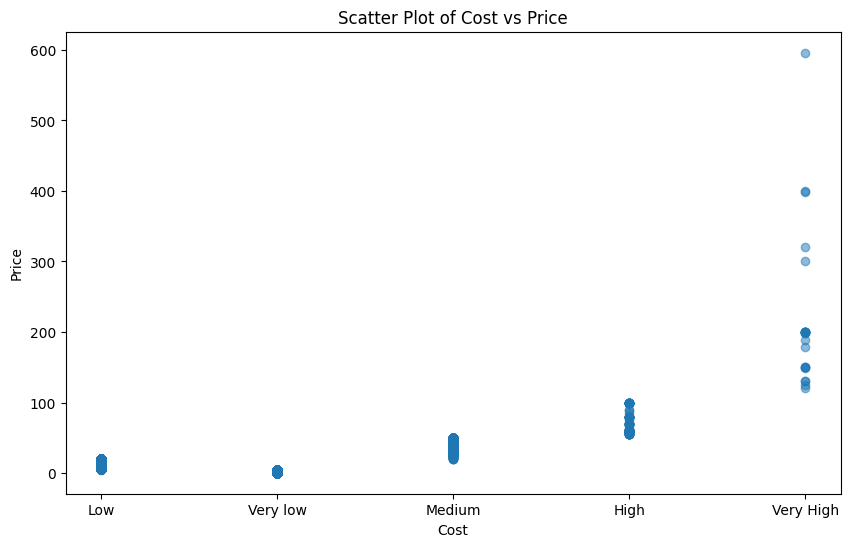

In [12]:
# Prints outlier scatter plot
data_cleaned = data.dropna(subset=['cost', 'price in USD'])
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['cost'], data_cleaned['price in USD'], alpha=0.5)
plt.xlabel('Cost')
plt.ylabel('Price')
plt.title('Scatter Plot of Cost vs Price')
plt.show()

In [13]:
# Sorts by price in descending order

data_sorted = data.sort_values(by='price in USD', ascending=False)
data_sorted

,appid,name,developer,publisher,positive,negative,owners,average_forever,median_forever,price in USD,initial price in USD,discount,languages,genre,ccu,tags,cost
22822,821800,ADR-Labelling Game,Suomen Kuljetusturva Oy,Suomen Kuljetusturva Oy,1,0,"0 .. 20,000",0,0,595.99,595.99,0.0,"English, French, German, Finnish",Simulation,0,"{'Simulation': 39, 'Difficult': 8}",Very High
14136,585610,GameMaker Studio 2 UWP,YoYo Games Ltd.,YoYo Games Ltd.,1,0,"0 .. 20,000",0,0,399.99,399.99,0.0,"English, French, German, Spanish - Spain","Animation & Modeling, Design & Illustration, E...",0,"{'Game Development': 47, 'Design & Illustratio...",Very High
24970,883140,VEGAS Pro 16 Edit Steam Edition,MAGIX Software GmbH,MAGIX Software GmbH,12,7,"0 .. 20,000",0,0,399.00,399.00,0.0,"English, French, German, Spanish - Spain","Audio Production, Video Production",0,"{'Video Production': 22, 'Audio Production': 21}",Very High
26695,942030,Marvelous Designer 8 for Steam,CLO Virtual Fashion,CLO Virtual Fashion,4,0,"0 .. 20,000",0,0,320.00,320.00,0.0,"English, Japanese, Korean, Simplified Chinese","Animation & Modeling, Design & Illustration, G...",0,"{'Design & Illustration': 22, 'Game Developmen...",Very High
13602,571690,Facerig Studio for Individual Creators,Holotech Studios,Holotech Studios,2,0,"0 .. 20,000",0,0,299.99,299.99,0.0,"English, French, German, Spanish - Spain, Japa...","Animation & Modeling, Video Production",0,"{'Animation & Modeling': 22, 'Video Production...",Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22657,817520,烹饪吧！地狱土豆？！,NaN,NaN,0,0,"0 .. 20,000",0,0,NaN,NaN,NaN,NaN,NaN,0,[],NaN
22993,827660,Feminist Cyborg Vs Last guy(gay),NaN,NaN,0,0,"0 .. 20,000",0,0,NaN,NaN,NaN,NaN,NaN,0,[],NaN
23638,846260,Murderous Pursuits Beta,NaN,NaN,0,0,"0 .. 20,000",0,0,NaN,NaN,NaN,NaN,NaN,0,[],NaN
26731,943490,Team Fortress 2008,NaN,NaN,0,0,"0 .. 20,000",0,0,NaN,NaN,NaN,NaN,NaN,0,[],NaN


 # Nominal Attributes

 The nominal attributes selected were: 'name', 'developer', 'publisher', 'genre', 'languages'.

In [14]:
# Getting/Printing the nominal attributes
nominal_attributes_values = data[['name', 'developer', 'publisher', 'genre', 'languages']]
print("Nominal Attributes:")
nominal_attributes_values

Nominal Attributes:


,name,developer,publisher,genre,languages
0,Counter-Strike,Valve,Valve,Action,"English, French, German, Italian, Spanish - Sp..."
1,Team Fortress Classic,Valve,Valve,Action,"English, French, German, Italian, Spanish - Sp..."
2,Day of Defeat,Valve,Valve,Action,"English, French, German, Italian, Spanish - Spain"
3,Deathmatch Classic,Valve,Valve,Action,"English, French, German, Italian, Spanish - Sp..."
4,Half-Life: Opposing Force,Gearbox Software,Valve,Action,"English, French, German, Korean"
...,...,...,...,...,...
29230,Room of Pandora,SHEN JIAWEI,SHEN JIAWEI,"Adventure, Casual, Indie","English, Japanese, Simplified Chinese, Traditi..."
29231,Cyber Gun,Semyon Maximov,BekkerDev Studio,"Action, Adventure, Indie",English
29232,Super Star Blast,EntwicklerX,EntwicklerX,"Action, Casual, Indie",English
29233,New Yankee 7: Deer Hunters,Yustas Game Studio,Alawar Entertainment,"Adventure, Casual, Indie","English, German, Korean, Russian"


# Binary Attribute
Since there is no binary value in our data, we create one by defining a 'free' and 'non-free' game

A price of 0 indicates a free game, otherwise the game in non-free

In [15]:
# Checks if price is 0 and makes a new column 'is_free' that tells us if the game is free or not
data['is_free'] = data['price in USD'] == 0
data

,appid,name,developer,publisher,positive,negative,owners,average_forever,median_forever,price in USD,initial price in USD,discount,languages,genre,ccu,tags,cost,is_free
0,10,Counter-Strike,Valve,Valve,124534,3339,"10,000,000 .. 20,000,000",17612,317,9.99,9.99,0.0,"English, French, German, Italian, Spanish - Sp...",Action,14923,"{'Action': 2681, 'FPS': 2048, 'Multiplayer': 1...",Low,False
1,20,Team Fortress Classic,Valve,Valve,3318,633,"5,000,000 .. 10,000,000",277,62,4.99,4.99,0.0,"English, French, German, Italian, Spanish - Sp...",Action,87,"{'Action': 208, 'FPS': 188, 'Multiplayer': 172...",Very low,False
2,30,Day of Defeat,Valve,Valve,3416,398,"5,000,000 .. 10,000,000",187,34,4.99,4.99,0.0,"English, French, German, Italian, Spanish - Spain",Action,130,"{'FPS': 138, 'World War II': 122, 'Multiplayer...",Very low,False
3,40,Deathmatch Classic,Valve,Valve,1273,267,"5,000,000 .. 10,000,000",258,184,4.99,4.99,0.0,"English, French, German, Italian, Spanish - Sp...",Action,4,"{'Action': 85, 'FPS': 71, 'Multiplayer': 58, '...",Very low,False
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,5250,288,"5,000,000 .. 10,000,000",624,415,4.99,4.99,0.0,"English, French, German, Korean",Action,71,"{'FPS': 235, 'Action': 211, 'Sci-fi': 166, 'Si...",Very low,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29230,1065230,Room of Pandora,SHEN JIAWEI,SHEN JIAWEI,3,0,"0 .. 20,000",0,0,2.54,2.99,15.0,"English, Japanese, Simplified Chinese, Traditi...","Adventure, Casual, Indie",0,"{'Adventure': 21, 'Indie': 21, 'Casual': 21, '...",Very low,False
29231,1065570,Cyber Gun,Semyon Maximov,BekkerDev Studio,8,1,"0 .. 20,000",0,0,1.19,1.99,40.0,English,"Action, Adventure, Indie",1,"{'Action': 21, 'Indie': 21, 'Adventure': 20, '...",Very low,False
29232,1065650,Super Star Blast,EntwicklerX,EntwicklerX,0,1,"0 .. 20,000",0,0,4.24,4.99,15.0,English,"Action, Casual, Indie",0,"{'Action': 21, 'Indie': 21, 'Casual': 21}",Very low,False
29233,1066700,New Yankee 7: Deer Hunters,Yustas Game Studio,Alawar Entertainment,2,0,"0 .. 20,000",0,0,6.99,6.99,0.0,"English, German, Korean, Russian","Adventure, Casual, Indie",1,"{'Indie': 21, 'Casual': 21, 'Adventure': 20}",Low,False


In [16]:
# Uses a boolean function to determine if the game is free
data['is_free'] = data['price in USD'] == 0

# Prints column names
print("Column Names:", data.columns.tolist())

# Prints the binary values we are using
values = data['is_free'].unique()
print("Binary Attribute Unique Values:", values)

# Counts the number of free and non-free games
free_game_count = data['is_free'].value_counts()

# Prints the result
print("\nNumber of Non-Free Games:", free_game_count.iloc[0])
print("Number of Free Games:", free_game_count.iloc[1])

Column Names: ['appid', 'name', 'developer', 'publisher', 'positive', 'negative', 'owners', 'average_forever', 'median_forever', 'price in USD', 'initial price in USD', 'discount', 'languages', 'genre', 'ccu', 'tags', 'cost', 'is_free']
Binary Attribute Unique Values: [False  True]

Number of Non-Free Games: 25583
Number of Free Games: 3652


# Ordinal Attribute
Here we use the bin from earlier to represent price ranges with ordered categories: ['Very low', 'Low', 'Medium', 'High', 'Very High'].

In [17]:
# Gets the unique labels in the 'cost' column
ordinal_labels = data['cost'].cat.categories.tolist()

# Prints ordinal labels
print("Labels representing ordinal attributes:")
print(data['cost'])

Labels representing ordinal attributes:
0             Low
1        Very low
2        Very low
3        Very low
4        Very low
           ...   
29230    Very low
29231    Very low
29232    Very low
29233         Low
29234         Low
Name: cost, Length: 29235, dtype: category
Categories (5, object): ['Very low' < 'Low' < 'Medium' < 'High' < 'Very High']


# Statistics

Here we present the mean, median, min, max, standard deviation, variance, sum and product of the 'price', 'positive' review and 'negative' review columns

In [18]:
# Extracts the "price" column
price_column = data['price in USD']

# Fills missing values in the "price" column with the mean and convert the price column to numeric type, replacing non-numeric values
data['price in USD'] = data['price in USD'].fillna(data['price in USD'].mean())
data['price in USD'] = pd.to_numeric(data['price in USD'], errors='coerce')

# Calculates the mean and median of the price column
mean_price = np.mean(price_column)
median_price = np.median(data['price in USD'])

# Calculates the standard deviation and variace of the price
standard_price = np.std(price_column)
variance_price = np.var(price_column)

# Calculates the minimum and maximum point of the price
min_price = np.min(price_column)
max_price = np.max(price_column)

# Calculate the sum and product of the "price" column
sum_price = np.sum(price_column)
product_price = np.product(price_column)

# Prints min and max price
print("Minimum price:", min_price)
print("Maximum price:", max_price)

# Prints the mean and median values of the prices
print("Mean price:", mean_price)
print("Median price:", median_price)

# Prints the standard deviation and variance of the price
print("Standard deviation of price:", standard_price)
print("Variance of price:", variance_price)

# Prints the sum and product of the price
print("Sum of price:", sum_price)
print("Product of price:", product_price)

Minimum price: 0.0
Maximum price: 595.99
Mean price: 7.778113743751285
Median price: 4.99
Standard deviation of price: 11.35258364844636
Variance of price: 128.8811554949717
Sum of price: 227167.59000000003
Product of price: 0.0


## Presenting the cleaned and updated version of the data

In [19]:
data

,appid,name,developer,publisher,positive,negative,owners,average_forever,median_forever,price in USD,initial price in USD,discount,languages,genre,ccu,tags,cost,is_free
0,10,Counter-Strike,Valve,Valve,124534,3339,"10,000,000 .. 20,000,000",17612,317,9.99,9.99,0.0,"English, French, German, Italian, Spanish - Sp...",Action,14923,"{'Action': 2681, 'FPS': 2048, 'Multiplayer': 1...",Low,False
1,20,Team Fortress Classic,Valve,Valve,3318,633,"5,000,000 .. 10,000,000",277,62,4.99,4.99,0.0,"English, French, German, Italian, Spanish - Sp...",Action,87,"{'Action': 208, 'FPS': 188, 'Multiplayer': 172...",Very low,False
2,30,Day of Defeat,Valve,Valve,3416,398,"5,000,000 .. 10,000,000",187,34,4.99,4.99,0.0,"English, French, German, Italian, Spanish - Spain",Action,130,"{'FPS': 138, 'World War II': 122, 'Multiplayer...",Very low,False
3,40,Deathmatch Classic,Valve,Valve,1273,267,"5,000,000 .. 10,000,000",258,184,4.99,4.99,0.0,"English, French, German, Italian, Spanish - Sp...",Action,4,"{'Action': 85, 'FPS': 71, 'Multiplayer': 58, '...",Very low,False
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,5250,288,"5,000,000 .. 10,000,000",624,415,4.99,4.99,0.0,"English, French, German, Korean",Action,71,"{'FPS': 235, 'Action': 211, 'Sci-fi': 166, 'Si...",Very low,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29230,1065230,Room of Pandora,SHEN JIAWEI,SHEN JIAWEI,3,0,"0 .. 20,000",0,0,2.54,2.99,15.0,"English, Japanese, Simplified Chinese, Traditi...","Adventure, Casual, Indie",0,"{'Adventure': 21, 'Indie': 21, 'Casual': 21, '...",Very low,False
29231,1065570,Cyber Gun,Semyon Maximov,BekkerDev Studio,8,1,"0 .. 20,000",0,0,1.19,1.99,40.0,English,"Action, Adventure, Indie",1,"{'Action': 21, 'Indie': 21, 'Adventure': 20, '...",Very low,False
29232,1065650,Super Star Blast,EntwicklerX,EntwicklerX,0,1,"0 .. 20,000",0,0,4.24,4.99,15.0,English,"Action, Casual, Indie",0,"{'Action': 21, 'Indie': 21, 'Casual': 21}",Very low,False
29233,1066700,New Yankee 7: Deer Hunters,Yustas Game Studio,Alawar Entertainment,2,0,"0 .. 20,000",0,0,6.99,6.99,0.0,"English, German, Korean, Russian","Adventure, Casual, Indie",1,"{'Indie': 21, 'Casual': 21, 'Adventure': 20}",Low,False


# Visualization

## Bar chart

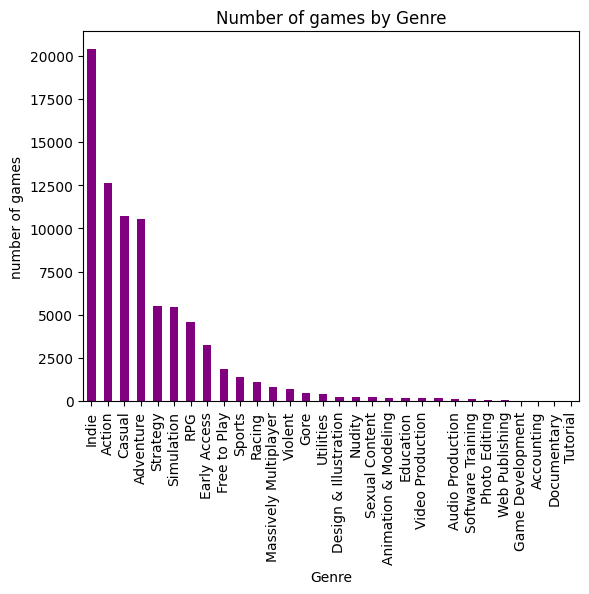

In [20]:
#Check for missing values and replace with an empty string
data['genre'] = data['genre'].fillna('')

#Splits the genres and create a list of all genres
all_genres = [genre.split(', ') for genre in data['genre']]
all_genres_flat = [item for sublist in all_genres for item in sublist]

#Creates a dataframe to count the number of each genre
genre_counts = pd.Series(all_genres_flat).value_counts()

genre_counts.plot(kind='bar', color='purple')
plt.xlabel('Genre')
plt.ylabel('number of games')
plt.title('Number of games by Genre')
plt.show()


## Pie chart

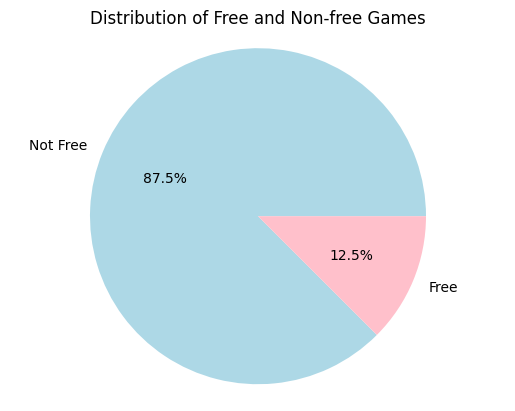

In [21]:

#counts the occurrences of each category
value_counts = data['is_free'].value_counts()

#labels for the values (since it was true and false, because we were working with boolean.)
labels = value_counts.index.map({True: 'Free', False: 'Not Free'})

#create a pie chart
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'pink'])

plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title('Distribution of Free and Non-free Games')

plt.show()

## Histograms

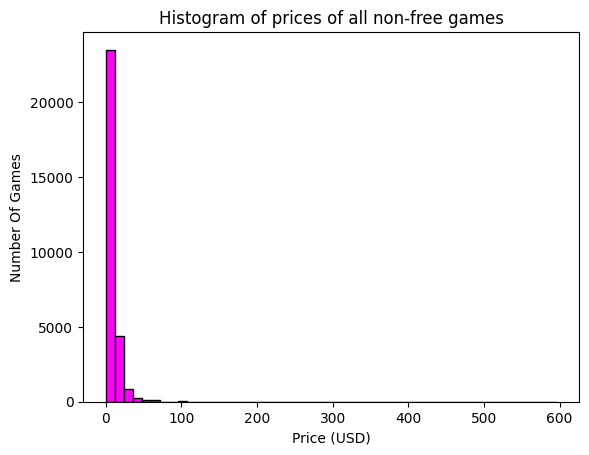

In [22]:
plt.hist(data['price in USD'], bins=50, color='magenta', edgecolor='black')

plt.xlabel('Price (USD)')
plt.ylabel('Number Of Games')
plt.title('Histogram of prices of all non-free games')

plt.show()


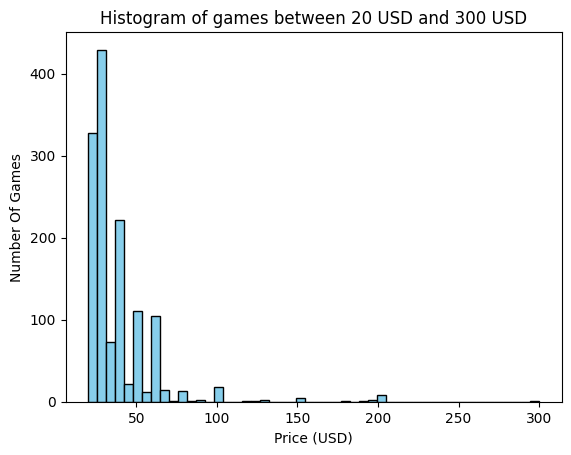

In [23]:
filtered_data = [x for x in data['price in USD'] if 20 < x < 300]

plt.hist(filtered_data, bins=50, color='skyblue', edgecolor='black')

plt.xlabel('Price (USD)')
plt.ylabel('Number Of Games')
plt.title('Histogram of games between 20 USD and 300 USD')

plt.show()